In [1]:
import pandas as pd
import numpy as np
import torch
import cv2 as cv

from matplotlib import pyplot as plt
from accelerate.test_utils.testing import get_backend
from PIL import Image
from transformers import YolosFeatureExtractor, YolosForObjectDetection,AutoImageProcessor

/home/jochen/Spiced/Capstone/kaggle_cryo/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("train_labels.csv")

In [3]:
df.head()

row_id      tomo_id  Motor axis 0  Motor axis 1  Motor axis 2  \
0       0  tomo_003acc          -1.0          -1.0          -1.0   
1       1  tomo_00e047         169.0         546.0         603.0   
2       2  tomo_00e463         235.0         403.0         137.0   
3       3  tomo_00e463         243.0         363.0         153.0   
4       4  tomo_00e463         222.0         379.0         144.0   

   Array shape (axis 0)  Array shape (axis 1)  Array shape (axis 2)  \
0                   500                  1912                  1847   
1                   300                   959                   928   
2                   500                   924                   956   
3                   500                   924                   956   
4                   500                   924                   956   

   Voxel spacing  Number of motors  
0            6.5                 0  
1           15.6                 1  
2           19.7                 6  
3           19.7                 6  
4           19.7                 6

In [3]:
detections=df[df["Number of motors"]>0].values

random_int=int(np.random.choice(451,1)[0])
rand_img=detections[random_int]
rand_path=f"train/{rand_img[1]}/slice_{int(rand_img[2]):04d}.jpg"

In [ ]:
detections=df[df["Number of motors"]>0].values

random_int=int(np.random.choice(451,1))
rand_img=detections[random_int]
rand_path=f"train/{rand_img[1]}/slice_{int(rand_img[2]):04d}.jpg"

image=Image.open(rand_path)
model_path="yolos_base_finetuned_yolololos/yolosv3-fixed-leak/checkpoint-1394/checkpoint-1394"

device, _, _ = get_backend()

image_processor=AutoImageProcessor.from_pretrained(model_path)
model = YolosForObjectDetection.from_pretrained(model_path)
model = model.to(device)

image_rgb = Image.merge("RGB", (image, image, image))
inputs = image_processor(images=image_rgb, return_tensors="pt")
outputs = model(**inputs.to(device))
target_sizes = torch.tensor([[image_rgb.size[1], image_rgb.size[0]]])
sub_results = image_processor.post_process_object_detection(outputs, threshold=0.9 , target_sizes=target_sizes)


/tmp/ipykernel_11289/744010236.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  random_int=int(np.random.choice(451,1))
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [5]:
print(sub_results)
best=sub_results[0]
best

[{'scores': tensor([0.9974], device='cuda:0', grad_fn=<IndexBackward0>), 'labels': tensor([0], device='cuda:0'), 'boxes': tensor([[570.4431, 814.1014, 638.6608, 884.2911]], device='cuda:0',
       grad_fn=<IndexBackward0>)}]


{'scores': tensor([0.9974], device='cuda:0', grad_fn=<IndexBackward0>),
 'labels': tensor([0], device='cuda:0'),
 'boxes': tensor([[570.4431, 814.1014, 638.6608, 884.2911]], device='cuda:0',
        grad_fn=<IndexBackward0>)}

[570, 814] [638, 884]
849 604


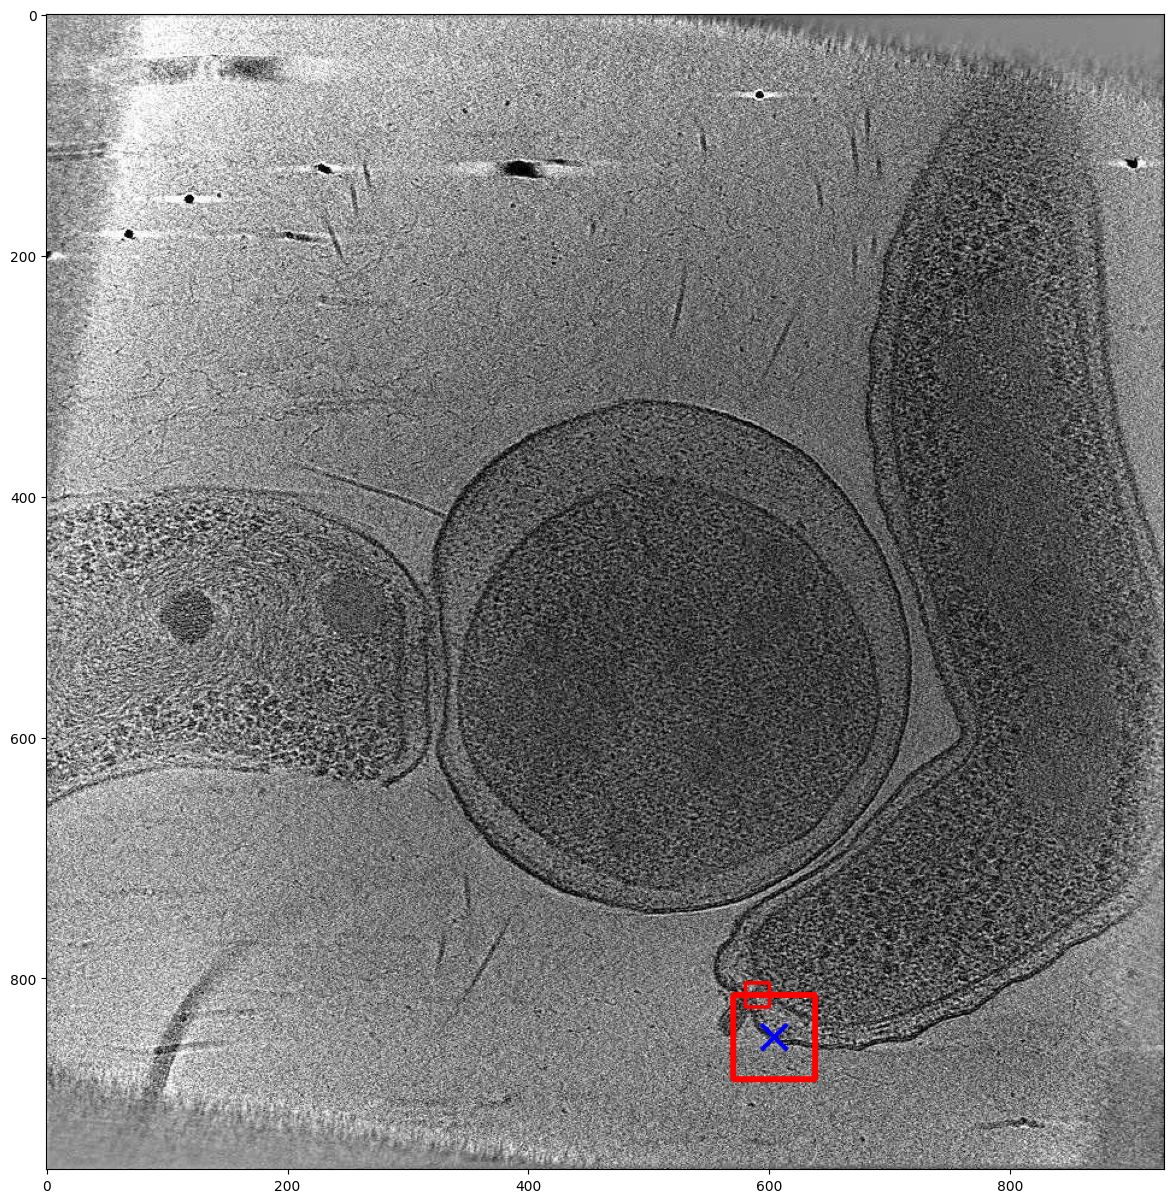

In [6]:

p1=[int(best["boxes"][0][0]),int(best["boxes"][0][1])]
p2=[int(best["boxes"][0][2]),int(best["boxes"][0][3])]
print(p1,p2)
bild=cv.imread(rand_path)
#183           575           599
point_x=int((p1[0]+p2[0])/2)
point_y=int((p1[1]+p2[1])/2)
label_x=int(rand_img[4])
label_y=int(rand_img[3])
print(point_y,point_x)
bild=cv.rectangle(bild,p1,p2,color= (255, 0, 0),thickness = 3)
bild=cv.drawMarker(bild,[point_x,point_y],color=(0, 0, 255),markerType=1,thickness = 2)
bild=cv.drawMarker(bild,[label_x,label_y],color=(255, 0, 0),markerType=4,thickness = 2)

#cv.imwrite("random_predic/test_test.jpg", bild)
fig = plt.figure(figsize=[15,15])
plt.imshow(bild)
plt.show()

{'file_name': 'tomo_03437b/slice_0136.jpg', 'objects': {'bbox': [[655.0, 899.0, 70.0, 70.0]], 'category': [0], 'id': [0], 'area': [4900.0]}}

In [8]:
df[df["tomo_id"]=="tomo_03437b"]

row_id      tomo_id  Motor axis 0  Motor axis 1  Motor axis 2  \
13      13  tomo_03437b         138.0         864.0         620.0   

    Array shape (axis 0)  Array shape (axis 1)  Array shape (axis 2)  \
13                   300                   959                   928   

    Voxel spacing  Number of motors  
13           15.6                 1

(655, 899) (585, 829)
864 620


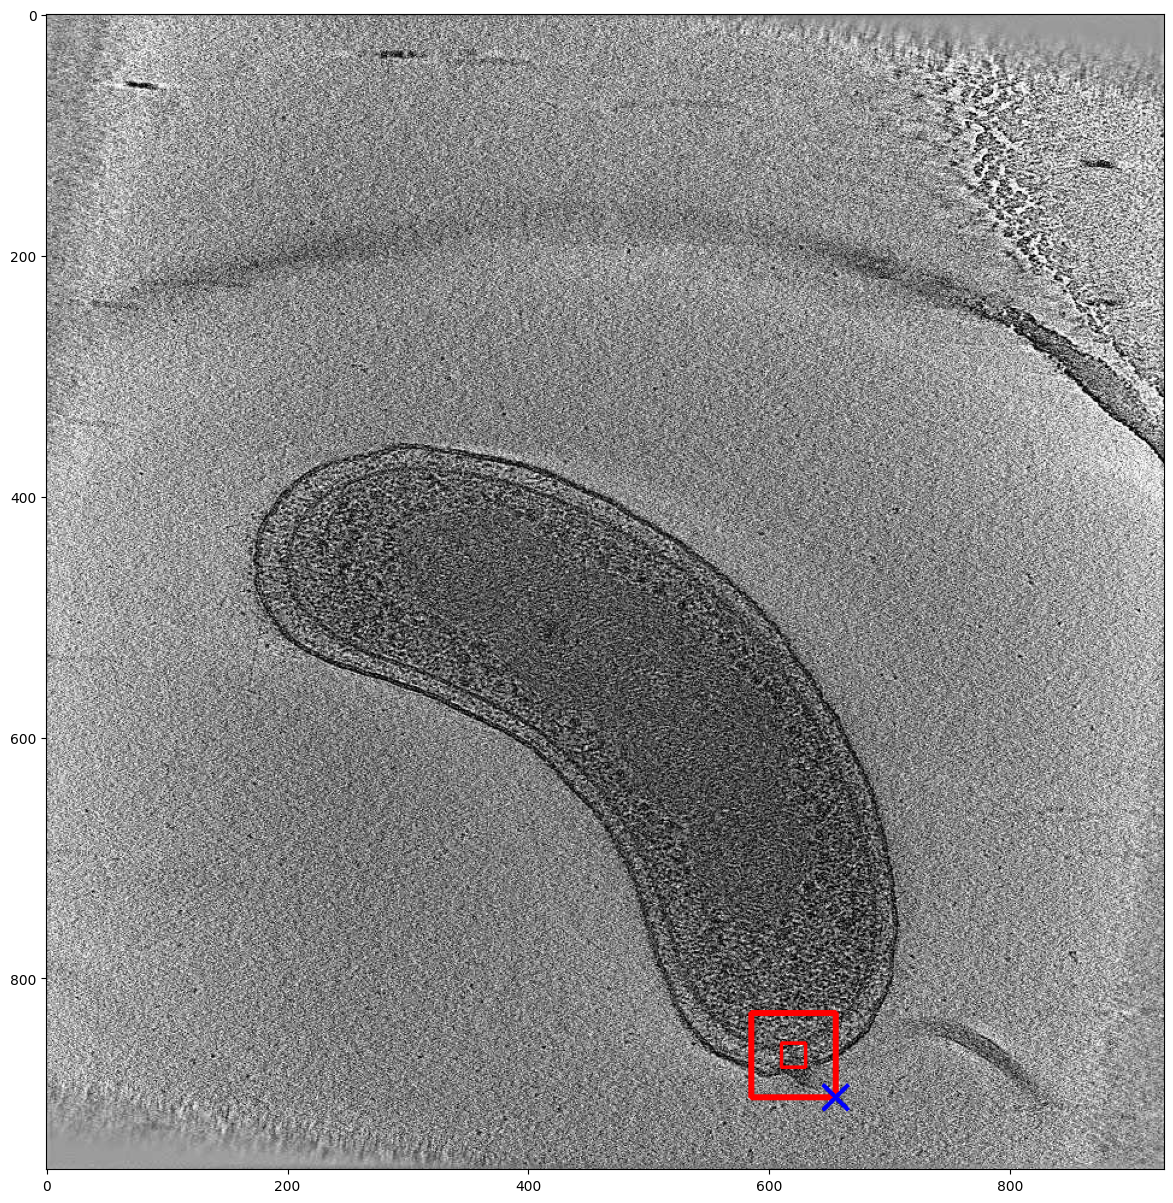

In [ ]:
p1=(655,899)
p2=(655-70,899-70)
print(p1,p2)
bild=cv.imread('train/tomo_03437b/slice_0136.jpg')
#183           575           599
point_x=int((p1[0]+p2[0])/2)
point_y=int((p1[1]+p2[1])/2)
label_x=620
label_y=864

bild=cv.rectangle(bild,p1,p2,color= (255, 0, 0),thickness = 3)
bild=cv.drawMarker(bild,[655,899],color=(0, 0, 255),markerType=1,thickness = 2)
bild=cv.drawMarker(bild,[620,864],color=(255, 0, 0),markerType=4,thickness = 2)

#cv.imwrite("random_predic/test_test.jpg", bild)
fig = plt.figure(figsize=[15,15])
plt.imshow(bild)
plt.show()